## Lead Score Case Study - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Leads.csv")
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format.

In [7]:
## We will begin by removing the Sales team data and Prospect ID   

In [8]:
df.drop(columns=['Prospect ID','Last Notable Activity','Last Activity','Lead Profile','Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Number'] , inplace= True)

In [9]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,Select,...,No,No,No,No,No,No,No,Select,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Select,...,No,No,No,No,No,No,No,Select,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,...,No,No,No,No,No,No,No,Mumbai,No,Yes


###### Understanding Unique Values of each  Categorical Feature

In [10]:
cols= df.columns.to_list()
for i in range(0, len(cols)):
     counts= df[cols[i]].value_counts()
     print("****************",cols[i]," **************")
     print(counts)

    

**************** Lead Origin  **************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
**************** Lead Source  **************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
welearnblog_Home        1
blog                    1
youtubechannel          1
Pay per Click Ads       1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64
**************** Do Not Email  **************
No     8506
Yes     734
Name: Do Not Email, dtype: int64
**************** Do Not Call  *******

#### Replacing ''Select'' with NAN

In [11]:
df = df.replace('Select', np.nan)

The keyword 'Select' was present in many filed which represents that the Candidate did not choose anything any value for that field hence it is same as NAN

In [12]:
df['City'].isnull().sum()

3669

In [13]:
# Checking for total count and percentage of null values 
total_count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(df.isnull().sum()/df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total_count, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.46
City,3669,39.71
Specialization,3380,36.58
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Lead Source,36,0.39
Do Not Email,0,0.00


In [14]:
df['How did you hear about X Education'].isnull().sum()

7250

In [15]:
df.drop(columns=['How did you hear about X Education'],inplace=True)

Since ~78% if the data in 'How did you hear about X Education' is NULL therefor we would be dropping the column at this point because it would not be able to add much information in our model buliding 

In [16]:
num_col= len(df.columns)
df['Nan_Perc'] = [df.loc[[index]].isna().sum().sum()/num_col for index in range(len(df) )]

In [17]:
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Nan_Perc
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,...,No,No,No,No,No,No,NaN,No,No,0.12
1,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,...,No,No,No,No,No,No,NaN,No,No,0.08
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,...,No,No,No,No,No,No,Mumbai,No,Yes,0.00
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,...,No,No,No,No,No,No,Mumbai,No,No,0.00
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,...,No,No,No,No,No,No,Mumbai,No,No,0.04


In [18]:
df.shape

(9240, 26)

In [19]:
df=df[df['Nan_Perc']<0.8]

In [20]:
df.shape

(9240, 26)

In [21]:
df.drop(columns=['Nan_Perc'],inplace=True)

In [22]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [23]:
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=142, 'other') if x.name=='Lead Source' else x)
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=15, 'other') if x.name=='Country' else x)
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=55, 'other') if x.name=='Lead Origin' else x)
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=73, 'other') if x.name=='Specialization' else x)
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=152, 'Other') if x.name=='How did you hear about X Education' else x)
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=210, 'other') if x.name=='What is your current occupation' else x)
df=df.apply(lambda x: x.mask(x.map(x.value_counts())<=2, 'other') if x.name=='What matters most to you in choosing a course' else x)

df['City'].replace({"Thane & Outskirts": "Other Cities of Maharashtra", "Tier II Cities": "Other Cities"}, inplace=True)


In [24]:
df['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
other              350
Name: Lead Source, dtype: int64

In [25]:
df['Country'].value_counts()

India                   6492
other                    120
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

In [26]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,NaN,NaN,...,No,No,No,No,No,No,No,NaN,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,NaN,...,No,No,No,No,No,No,No,NaN,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,...,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,...,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,NaN,...,No,No,No,No,No,No,No,Mumbai,No,No


By Grouping Categories having less Value_count to 'Others', we have tried to reduce the dimenisonality of the dataset which would have resulted after dummification.

###### Replacing No with 0 and 1 with Yes

In [27]:
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
           'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [28]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,NaN,NaN,...,0,0,0,0,0,0,0,NaN,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,India,NaN,...,0,0,0,0,0,0,0,NaN,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,...,0,0,0,0,0,0,0,Mumbai,0,1


#### Replacing Numerical Fields Nan with percentile

In [29]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

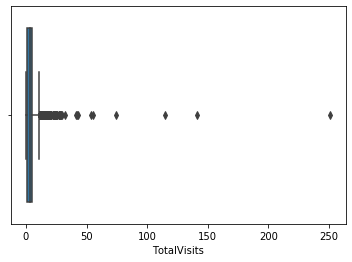

In [30]:
sns.boxplot(df['TotalVisits'])

df=df[df['TotalVisits']<250]

In [31]:
TotalVisits_mean= df['TotalVisits'].mean()
df['TotalVisits']=df['TotalVisits'].fillna(TotalVisits_mean)

In [32]:
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean())
df['Page Views Per Visit']=df['Page Views Per Visit'].astype(float,errors='ignore')

In [33]:
df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

#### Replacing Categorical Fields Nan With Unknown 

In [34]:
df['Lead Source']=df['Lead Source'].fillna('other')

In [35]:
df.fillna('Unknown',inplace=True)

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model. First, let's take a look at the dataset again.

### Creating Dummies

In [36]:
df.head(3)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Unknown,Unknown,...,0,0,0,0,0,0,0,Unknown,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Unknown,...,0,0,0,0,0,0,0,Unknown,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,...,0,0,0,0,0,0,0,Mumbai,0,1


In [37]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Lead Origin,Lead Source,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City
0,API,Olark Chat,Unknown,Unknown,Unemployed,Better Career Prospects,Unknown
1,API,Organic Search,India,Unknown,Unemployed,Better Career Prospects,Unknown
2,Landing Page Submission,Direct Traffic,India,Business Administration,other,Better Career Prospects,Mumbai
3,Landing Page Submission,Direct Traffic,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai
4,Landing Page Submission,Google,India,Unknown,Unemployed,Better Career Prospects,Mumbai


In [38]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_other,Country_Saudi Arabia,Country_Singapore,...,Specialization_other,What is your current occupation_Unknown,What is your current occupation_Working Professional,What is your current occupation_other,What matters most to you in choosing a course_Unknown,What matters most to you in choosing a course_other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Drop categorical variable columns
df = df.drop(list(df_categorical.columns), axis=1)

In [40]:
# Concatenate dummy variables with X
df= pd.concat([df, df_dummies], axis=1)
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Specialization_other,What is your current occupation_Unknown,What is your current occupation_Working Professional,What is your current occupation_other,What matters most to you in choosing a course_Unknown,What matters most to you in choosing a course_other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Unknown
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Model Building and Evaluation

Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

#### Train-Test Split

In [41]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

#### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [42]:
df_train.head(3)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Specialization_other,What is your current occupation_Unknown,What is your current occupation_Working Professional,What is your current occupation_other,What matters most to you in choosing a course_Unknown,What matters most to you in choosing a course_other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Unknown
1871,0,0,0,0.0,0,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6795,0,0,0,4.0,487,1.33,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3516,0,0,0,5.0,106,2.50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()


# Create a list of the variables that you need to scale
df_numeric= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Scale these variables using 'fit_transform'
df_train[df_numeric] = scaler.fit_transform(df_train[df_numeric])

In [44]:
# Split the train dataset into X and y

y_train = df_train['Converted']
df_train.drop(columns='Converted', inplace=True)
X_train = df_train

In [45]:
y_train.value_counts()

0    4002
1    2466
Name: Converted, dtype: int64

### Building the first model with all the features

In [46]:
# Instantiate
lr_base = LogisticRegression()

# Fit a line
lr_base.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
from sklearn import metrics
y_train_pred = lr_base.predict(X_train)
counf_matrix_base = metrics.confusion_matrix(y_train, y_train_pred)
print(counf_matrix_base)

[[3574  428]
 [ 826 1640]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4002
           1       0.79      0.67      0.72      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.78      0.79      6468
weighted avg       0.80      0.81      0.80      6468



In [49]:
TN = counf_matrix_base[0,0]
FP =counf_matrix_base[0,1]
FN = counf_matrix_base[1,0]
TP = counf_matrix_base[1,1]

In [50]:
Recall = (TP/(TP+FN))*100
print("Recall/Sensitivity",Recall)

Recall/Sensitivity 66.5044606650446


In [51]:
Precision = (TP/(TP+FP))*100
print("Precision",Precision)

Precision 79.3036750483559


#### Model Building Using RFE

Now, you have close to 60 features. It is obviously not possible to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [52]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lr_rfe_1= LogisticRegression()
rfe1 = RFE(lr_rfe_1, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

col1 = X_train.columns[rfe1.support_]  

In [53]:
f=rfe1.get_support(1)
X = df[df.columns[f]] 
X.columns

Index(['Do Not Email', 'TotalVisits', 'X Education Forums',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Organic Search', 'Lead Source_other',
       'Country_United States', 'Country_Unknown',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unknown',
       'What is your current occupation_other',
       'What matters most to you in choosing a course_Unknown'],
      dtype='object')

In [54]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Search', False, 17),
 ('Magazine', False, 38),
 ('Newspaper Article', False, 5),
 ('X Education Forums', False, 14),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', False, 11),
 ('Receive More Updates About Our Courses', False, 42),
 ('Update me on Supply Chain Content', False, 39),
 ('Get updates on DM Content', False, 40),
 ('I agree to pay the amount through cheque', False, 41),
 ('A free copy of Mastering The Interview', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_other', True, 1),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_other', False, 26),
 ('Country_Saudi Arabia', Tr

In [55]:
col1

Index(['Do Not Email', 'Total Time Spent on Website', 'Newspaper',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_other', 'Lead Source_Reference', 'Country_Saudi Arabia',
       'Country_Unknown', 'Country_other',
       'Specialization_Hospitality Management', 'Specialization_Unknown',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Unknown',
       'What matters most to you in choosing a course_other'],
      dtype='object')

In [56]:
# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe_sm = sm.add_constant(X_train_rfe1)
X_train_rfe_sm.head()

# Fitting the model with 15 variables
lr_rfe = sm.GLM(y_train, X_train_rfe_sm).fit()   
print(lr_rfe.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.14699
Method:                          IRLS   Log-Likelihood:                -2968.7
Date:                Sun, 13 Jun 2021   Deviance:                       948.35
Time:                        18:53:35   Pearson chi2:                     948.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [57]:
y_train_pred_rfe = lr_rfe.predict(X_train_rfe_sm)
y_train_pred_rfe=y_train_pred_rfe.values.reshape(-1)
y_train_pred_rfe = pd.DataFrame({'Train_Value':y_train.values,'Train_Pred': y_train_pred_rfe })
y_train_pred_rfe["Train_Pred_Prob"]= y_train_pred_rfe.Train_Pred.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_rfe.head(10)

,Train_Value,Train_Pred,Train_Pred_Prob
0,0,0.458980,0
1,0,0.196620,0
2,0,0.339793,0
3,0,0.616139,1
4,0,0.302296,0
5,1,1.033641,1
6,0,0.211098,0
7,1,1.218711,1
8,0,0.264475,0
9,1,0.710693,1


In [58]:
confusion_mat = metrics.confusion_matrix(y_train_pred_rfe.Train_Value,y_train_pred_rfe.Train_Pred_Prob)
print(confusion_mat)

[[3597  405]
 [ 875 1591]]


In [59]:
TN = confusion_mat[0,0]
FP =confusion_mat[0,1]
FN = confusion_mat[1,0]
TP = confusion_mat[1,1]

In [60]:
Recall = (TP/(TP+FN))*100
print("Recall/Sensitivity",Recall)

Recall/Sensitivity 64.51743714517437


In [61]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.66
6,Lead Source_Reference,4.35
8,Country_Unknown,2.81
11,Specialization_Unknown,2.15
13,What matters most to you in choosing a course_...,1.60
3,Lead Origin_Landing Page Submission,1.38
1,Total Time Spent on Website,1.26
12,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
5,Lead Origin_other,1.03


In [62]:
X_train_rfe1.drop('Country_Saudi Arabia', axis = 1, inplace = True)

In [63]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,4.66
6,Lead Source_Reference,4.35
7,Country_Unknown,2.81
10,Specialization_Unknown,2.15
12,What matters most to you in choosing a course_...,1.60
3,Lead Origin_Landing Page Submission,1.37
1,Total Time Spent on Website,1.26
11,What is your current occupation_Working Profes...,1.18
0,Do Not Email,1.11
5,Lead Origin_other,1.03


In [64]:
# Refitting with 14 variables

X_train_rfe_final_sm = sm.add_constant(X_train_rfe1)

# Fitting the model with 14 variables
lr_rfe_final=sm.GLM(y_train, X_train_rfe_final_sm).fit()   
print(lr_rfe_final.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14699
Method:                          IRLS   Log-Likelihood:                -2969.4
Date:                Sun, 13 Jun 2021   Deviance:                       948.54
Time:                        18:53:37   Pearson chi2:                     949.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [65]:
y_train_pred_rfe_final = lr_rfe_final.predict(X_train_rfe_final_sm)
y_train_pred_rfe_final=y_train_pred_rfe_final.values.reshape(-1)
y_train_pred_rfe_final = pd.DataFrame({'Train_Value':y_train.values,'Train_Pred': y_train_pred_rfe_final })
y_train_pred_rfe_final["Train_Pred_Prob"]= y_train_pred_rfe_final.Train_Pred.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_rfe_final.head(10)

,Train_Value,Train_Pred,Train_Pred_Prob
0,0,0.458941,0
1,0,0.196220,0
2,0,0.339855,0
3,0,0.615759,1
4,0,0.302342,0
5,1,1.033323,1
6,0,0.210555,0
7,1,1.218730,1
8,0,0.264444,0
9,1,0.710785,1


#### Finding Optimal Cutoff

In [66]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_rfe_final[i]= y_train_pred_rfe_final.Train_Pred.map(lambda x: 1 if x>i else 0)

y_train_pred_rfe_final.head(20)

,Train_Value,Train_Pred,Train_Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.458941,0,1,1,1,1,1,0,0,0,0,0
1,0,0.196220,0,1,1,0,0,0,0,0,0,0,0
2,0,0.339855,0,1,1,1,1,0,0,0,0,0,0
3,0,0.615759,1,1,1,1,1,1,1,1,0,0,0
4,0,0.302342,0,1,1,1,1,0,0,0,0,0,0
5,1,1.033323,1,1,1,1,1,1,1,1,1,1,1
6,0,0.210555,0,1,1,1,0,0,0,0,0,0,0
7,1,1.218730,1,1,1,1,1,1,1,1,1,1,1
8,0,0.264444,0,1,1,1,0,0,0,0,0,0,0
9,1,0.710785,1,1,1,1,1,1,1,1,1,0,0


In [67]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_rfe_final.Train_Value,y_train_pred_rfe_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.417285  0.997972  0.059470
0.1   0.1  0.501082  0.986618  0.201899
0.2   0.2  0.652288  0.937145  0.476762
0.3   0.3  0.751391  0.861719  0.683408
0.4   0.4  0.804731  0.740065  0.844578
0.5   0.5  0.802103  0.645174  0.898801
0.6   0.6  0.778293  0.528386  0.932284
0.7   0.7  0.740260  0.372668  0.966767
0.8   0.8  0.702226  0.235604  0.989755
0.9   0.9  0.673933  0.152474  0.995252


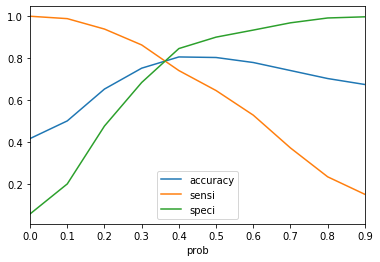

In [68]:
cutoff_df.plot.line(x="prob", y=["accuracy","sensi","speci"])
plt.show()

In [69]:
y_train_pred_rfe_optimal = lr_rfe_final.predict(X_train_rfe_final_sm)
y_train_pred_rfe_optimal=y_train_pred_rfe_optimal.values.reshape(-1)
y_train_pred_rfe_optimal = pd.DataFrame({'Train_Value':y_train.values,'Train_Pred': y_train_pred_rfe_optimal })
y_train_pred_rfe_optimal["Train_Pred_Prob"]= y_train_pred_rfe_optimal.Train_Pred.map(lambda x: 1 if x>0.3 else 0)
y_train_pred_rfe_optimal.head(10)

,Train_Value,Train_Pred,Train_Pred_Prob
0,0,0.458941,1
1,0,0.196220,0
2,0,0.339855,1
3,0,0.615759,1
4,0,0.302342,1
5,1,1.033323,1
6,0,0.210555,0
7,1,1.218730,1
8,0,0.264444,0
9,1,0.710785,1


In [70]:
confusion_matrix_final = metrics.confusion_matrix(y_train_pred_rfe_optimal.Train_Value,y_train_pred_rfe_optimal.Train_Pred_Prob)
print(confusion_matrix_final)

[[2735 1267]
 [ 341 2125]]


In [71]:
train_TN = confusion_matrix_final[0,0]
train_FP =confusion_matrix_final[0,1]
train_FN = confusion_matrix_final[1,0]
train_TP = confusion_matrix_final[1,1]

In [72]:
Recall = (train_TP/(train_TP+train_FN))*100
print("Recall/Sensitivity",Recall)

Recall/Sensitivity 86.17193836171938


In [73]:
Precision = (train_TP/(train_TP+train_FP))*100
print("Precision",Precision)

Precision 62.64740566037735


In [74]:
Specificity = (train_TN/(train_TN+ train_FP))*100
print("Specificity",Specificity)

Specificity 68.3408295852074


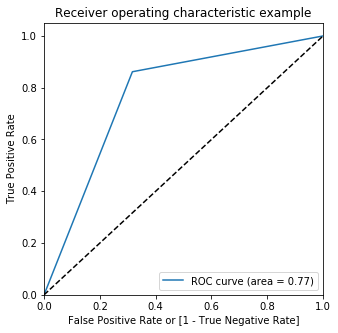

In [75]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_rfe_optimal.Train_Value,y_train_pred_rfe_optimal.Train_Pred_Prob)

## Making Predictions

We would first need to scale the test set as well. So let's start with that.

In [76]:
# Scale these variables using 'fit_transform'
df_test[df_numeric] = scaler.transform(df_test[df_numeric])


y_test = df_test['Converted']
df_test.drop(columns='Converted', inplace=True)
X_test= df_test


col1 = X_test.columns[rfe1.support_]  
# Subsetting training data for 15 selected columns
X_test_rfe1 = X_test[col1]
X_test_rfe1.drop('Country_Saudi Arabia', axis = 1, inplace = True)

# Add a constant to the model
X_test_rfe_sm = sm.add_constant(X_test_rfe1)


y_test_pred_rfe_optimal = lr_rfe_final.predict(X_test_rfe_sm)
y_test_pred_rfe_optimal=y_test_pred_rfe_optimal.values.reshape(-1)
y_test_pred_rfe_optimal = pd.DataFrame({'Test_Value':y_test.values,'Test_Pred': y_test_pred_rfe_optimal})
y_test_pred_rfe_optimal["Test_Pred_Prob"]= y_test_pred_rfe_optimal.Test_Pred.map(lambda x: 1 if x>0.3 else 0)
##y_test_pred_rfe_optimal["Test_Score"]= y_test_pred_rfe_optimal.Test_Pred.map(lambda x: x*100)
y_test_pred_rfe_optimal.head(10)


test_confusion_matrix_final = metrics.confusion_matrix(y_test_pred_rfe_optimal.Test_Value,y_test_pred_rfe_optimal.Test_Pred_Prob)
print(test_confusion_matrix_final)

test_TN = test_confusion_matrix_final[0,0]
test_FP =test_confusion_matrix_final[0,1]
test_FN = test_confusion_matrix_final[1,0]
test_TP = test_confusion_matrix_final[1,1]


[[1121  556]
 [ 136  959]]


In [77]:
test_TN = test_confusion_matrix_final[0,0]
test_FP =test_confusion_matrix_final[0,1]
test_FN = test_confusion_matrix_final[1,0]
test_TP = test_confusion_matrix_final[1,1]


In [78]:
Recall = (test_TP/(test_TP+test_FN))*100
print("Recall/Sensitivity",Recall)


Recall/Sensitivity 87.57990867579909


In [79]:
Precision = (test_TP/(test_TP+test_FP))*100
print("Precision",Precision)



Precision 63.300330033003306


In [80]:
Specificity = (test_TN/(test_TN+test_FP))*100
print("Specificity",Specificity)

Specificity 66.84555754323196


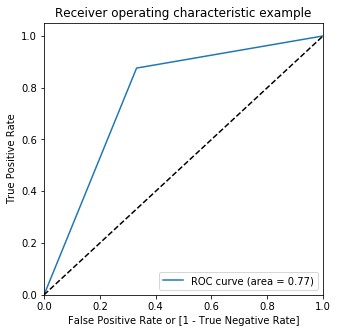

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_pred_rfe_optimal.Test_Value,y_test_pred_rfe_optimal.Test_Pred_Prob)